Utiliza el algoritmo C-Means para agrupar los datos del fichero synthetic_data2.csv y visualiza los resultados gráficamente.

Averigua el número de clusters óptimo utilizando Elbow y BIC.
Visualiza los resultados utilizando un gráfico de dispersión. Cada punto en el gráfico debe ser coloreado de acuerdo con el cluster al que pertenece y mostrar el grado de pertenencia.
Comprueba si este resultado coincide con la agrupación real que puedes encontrar en el fichero synthetic_data2_with_labels.csv. 

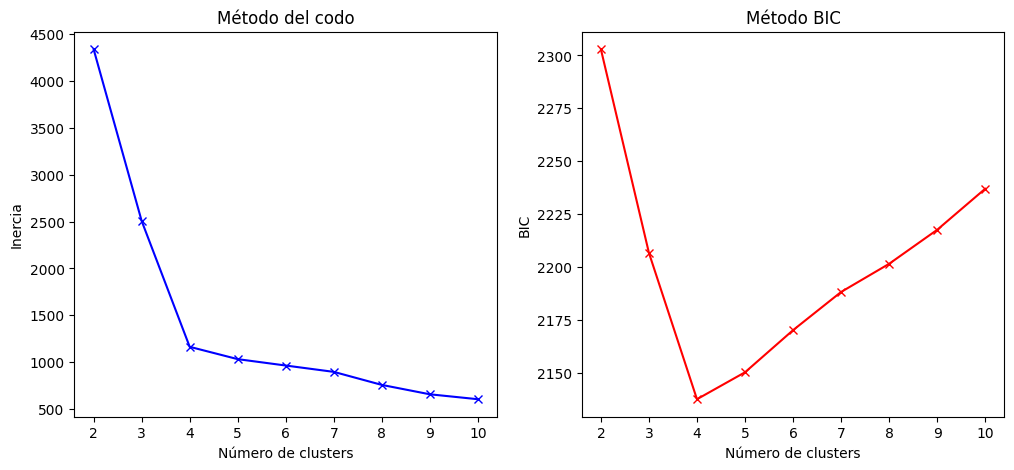

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Carga los datos del fichero synthetic_data1.csv
datos = pd.read_csv('csv/synthetic_data2.csv')

# Convierte los datos a matriz numpy
X = datos.values

# Función para calcular el índice BIC
def BIC(K, grupos, X):
    N = X.shape[0]  # Número de datos
    P = X.shape[1]  # Número de variables
    xi = np.zeros((1, K))  # Vector xi

    # Calcula el sumatorio de xi en la fórmula
    for k in range(0, K):
        suma = 0
        for j in range(0, P):
            sigma = np.square(np.std(X[:, j]))
            sigma_j = np.square(np.std(X[grupos == k, j]))
            suma += 0.5 * np.log(sigma + sigma_j)

        n_k = sum(grupos == k)  # Número de elementos en el grupo k
        xi[0, k] = -n_k * suma

    bic = -2 * np.sum(xi) + 2 * K * P * np.log(N)
    return bic

# Encuentra el número óptimo de clusters utilizando Elbow y BIC
Kmax = 10
inercias = []
bics = []

for k in range(2, Kmax + 1):
    kmeans = KMeans(n_clusters=k, random_state=10)
    kmeans.fit(X)
    grupos = kmeans.predict(X)
    inercias.append(kmeans.inertia_)
    bics.append(BIC(k, grupos, X))

# Graficar Elbow
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(2, Kmax + 1), inercias, 'bx-')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.title('Método del codo')

# Graficar BIC
plt.subplot(1, 2, 2)
plt.plot(range(2, Kmax + 1), bics, 'rx-')
plt.xlabel('Número de clusters')
plt.ylabel('BIC')
plt.title('Método BIC')

plt.show()

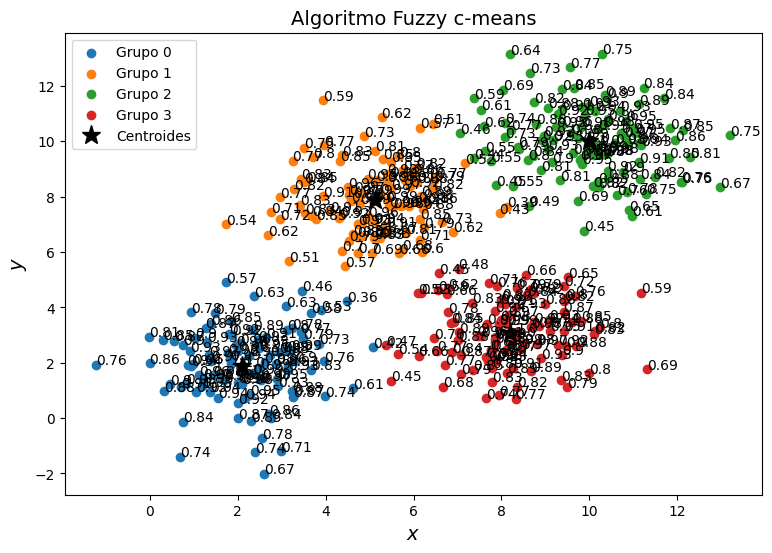

In [3]:
from skfuzzy import cmeans

# Extraer las características relevantes de los datos
datos_cluster = datos[['x', 'y']].values

# Definir los parámetros de FCM
K = 4  # Número de clusters
m = 2  # Parámetro de FCM, 2 es el defecto
tolerancia = 1e-5  # Tolerancia (criterio de parada)
maxiter = 100  # Número máximo de iteraciones

# Ejecutar FCM en los datos
cntr, u, _, _, _, _, _ = cmeans(datos_cluster.T, K, m, tolerancia, maxiter, seed=100)

# Obtener a qué grupo pertenece cada observación
grupos = np.argmax(u, axis=0)  # Devuelve los índices del valor máximo sobre el eje 0 (filas)

# Obtener el grado de pertenencia al grupo con mayor pertenencia
maxU = np.amax(u, axis=0)  # Devuelve el valor máximo sobre el eje 0 (filas)

# Representación gráfica de la solución
plt.figure(figsize=(9, 6))

# Representar las observaciones asociadas con cada grupo (cluster)
for k in range(0, K):
    plt.scatter(datos_cluster[grupos == k, 0], datos_cluster[grupos == k, 1], label="Grupo {}".format(k))

# Representar junto a cada observación el grado de pertenencia al grupo
for i, maxU_i in enumerate(np.round(maxU, 2)):
    plt.annotate(maxU_i, (datos_cluster[i, 0], datos_cluster[i, 1]))

plt.plot(cntr[:, 0], cntr[:, 1], 'k*', markersize=14, label="Centroides")  # Dibujamos los centroides

plt.title("Algoritmo Fuzzy c-means", fontsize=14)
plt.xlabel(r"$x$", fontsize=14)
plt.ylabel(r"$y$", fontsize=14)
plt.legend()
plt.show()

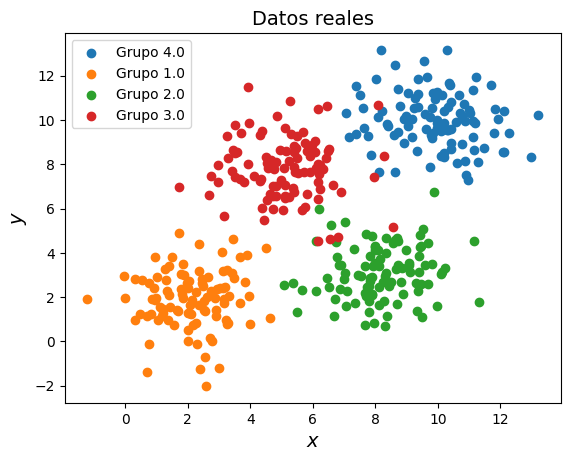

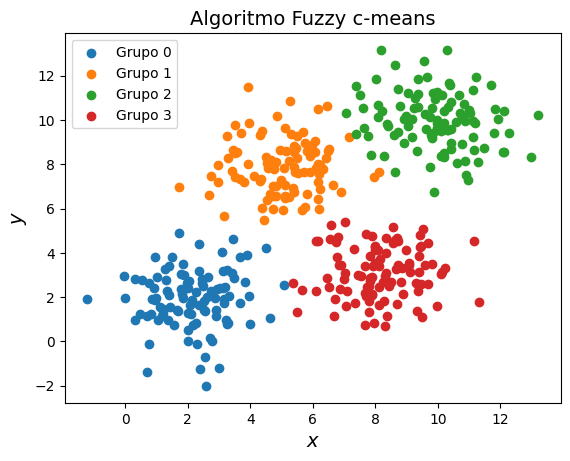

In [16]:
# Carga los datos del fichero synthetic_data1_with_labels.csv
datos_con_etiquetas = pd.read_csv('csv/synthetic_data2_with_labels.csv')

# Representar los datos reales
for etiqueta in datos_con_etiquetas['class'].unique():
    plt.scatter(datos_con_etiquetas[datos_con_etiquetas['class'] == etiqueta]['x'],
                datos_con_etiquetas[datos_con_etiquetas['class'] == etiqueta]['y'],
                label="Grupo {}".format(etiqueta))
    
plt.title("Datos reales", fontsize=14)
plt.xlabel(r"$x$", fontsize=14)
plt.ylabel(r"$y$", fontsize=14)
plt.legend()
plt.show()

# Representar las observaciones asociadas con cada grupo (cluster)
for k in range(0, K):
    plt.scatter(datos_cluster[grupos == k, 0], datos_cluster[grupos == k, 1], label="Grupo {}".format(k))

plt.title("Algoritmo Fuzzy c-means", fontsize=14)
plt.xlabel(r"$x$", fontsize=14)
plt.ylabel(r"$y$", fontsize=14)
plt.legend()
plt.show()